# Credit card fraud detection
Dataset taken from [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [4]:
#Importing packages for EDA 
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/Users/pavemakouski/Documents/RP_records/Code/datasets/creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


All variables that start the capital 'V' represent features that were obtained using Principal Component Analysis (PCA). The original features are not available due to the confidentiality concerns.

In [3]:
print(len(df))
print(df.info())

284807
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21

In [4]:
df.apply(lambda x: x.isna().sum())
#No NAs observed in the columns

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Calculate the percentage of each class
class_counts = df['Class'].value_counts(normalize=True) * 100

# Create the figure
fig = go.Figure(data=[
    go.Bar(
        name='Class 0',
        x=['Class Distribution'],
        y=[class_counts[0]],
        marker_color='lightblue',
        text=f"{class_counts[0]:.2f}%",  # Add percentage text
        textposition='inside',  # Position the text inside the bar
        textfont=dict(color='black')  # Set text color
    ),
    go.Bar(
        name='Class 1',
        x=['Class Distribution'],
        y=[class_counts[1]],
        marker_color='yellow',
        text=f"{class_counts[1]:.2f}%",  # Add percentage text
        textposition='inside',  # Position the text inside the bar
        textfont=dict(color='black')  # Set text color
    )
])

# Update layout to stack the bars
fig.update_layout(
    barmode='stack',  # Stack the bars
    title='Class Distribution',
    xaxis_title='',
    yaxis_title='Percentage',
    yaxis=dict(range=[0, 100]),  # Set y-axis from 0 to 100
    showlegend=True
)

# Show the figure
fig.show()


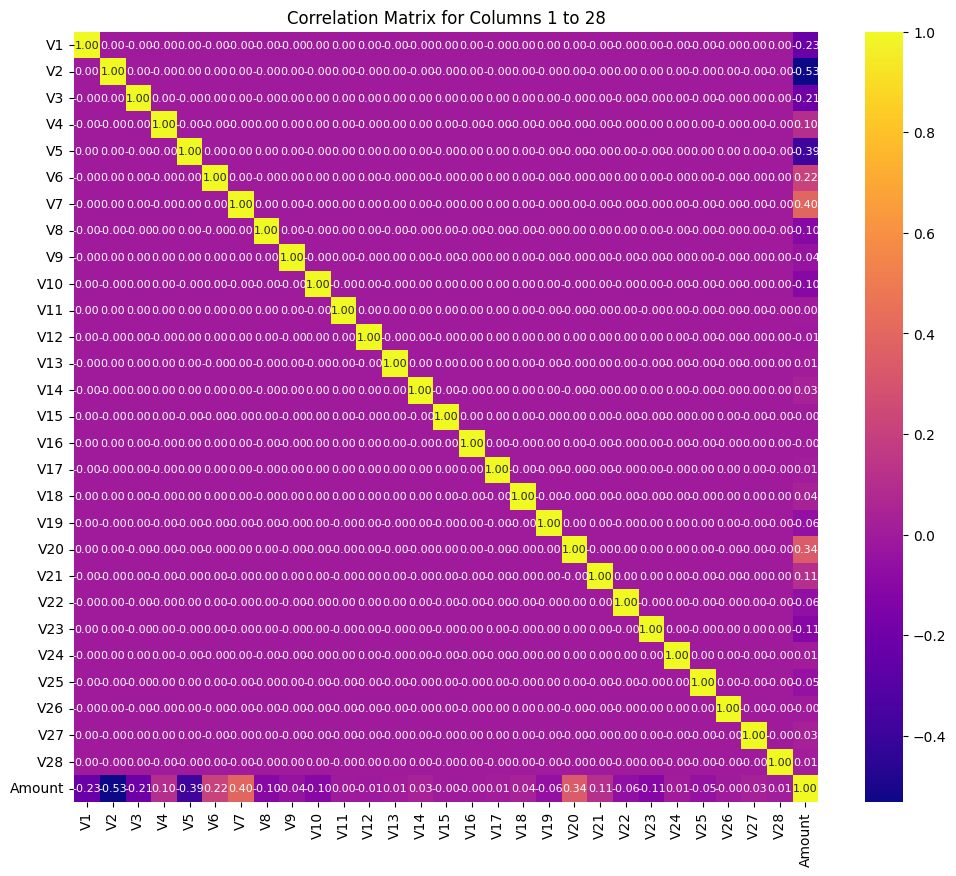

In [16]:
df_subset = df.iloc[:, 1:30]

# Calculate the correlation matrix
corr_matrix = df_subset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='plasma', cbar=True, annot_kws={"size": 8})
plt.title('Correlation Matrix for Columns 1 to 28')
plt.show()

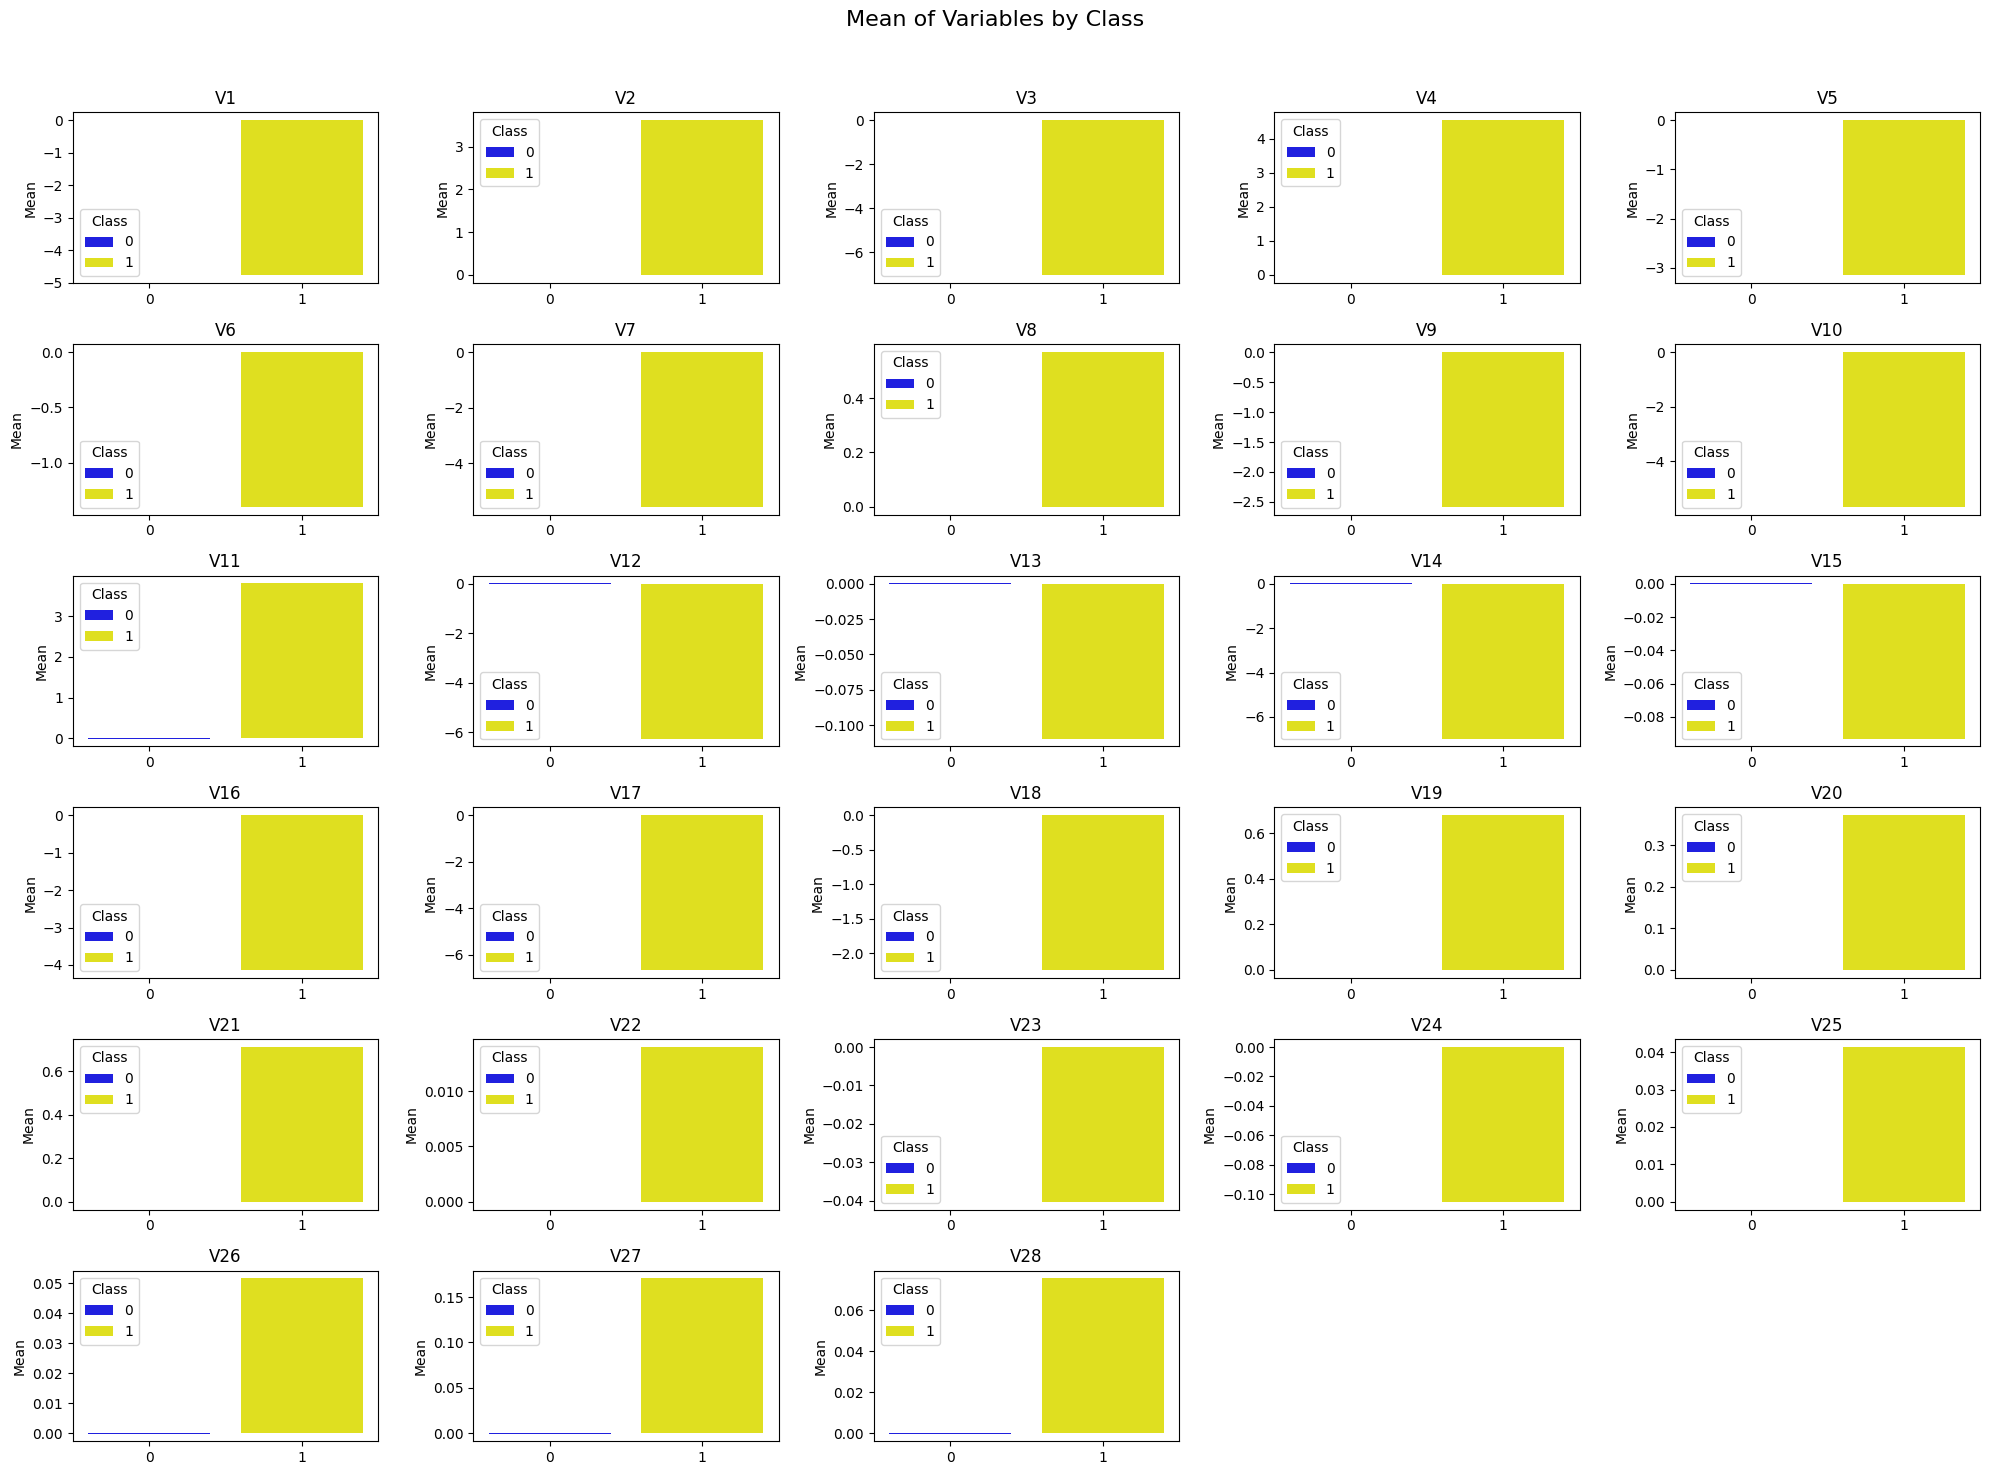

In [20]:
columns_to_plot = df.columns[1:29]

# Create a grid of subplots
n_cols = 5
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate the required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
fig.suptitle('Mean of Variables by Class', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each variable
for i, col in enumerate(columns_to_plot):
    sns.barplot(x='Class', y=col, data=df, ax=axes[i], errorbar=None, palette=['blue', 'yellow'], hue = 'Class')
    axes[i].set_title(col)
    axes[i].set_xlabel('')  # Remove x-label for clarity
    axes[i].set_ylabel('Mean')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

## Beginning data manipulation

In [38]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Perform stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [39]:
print(f"The shape of the feature training dataset is {X_train.shape}, class training -- {y_train.shape}, feature testing -- {X_train.shape}, and label testing -- {y_test.shape}")

The shape of the feature training dataset is (227845, 30), class training -- (227845,), feature testing -- (227845, 30), and label testing -- (56962,)


Due to the fact that this dataset is so imbalanced, it would be wise to use a technique to tackle this issue. Undersampling is a popular choice to mitigate unbalanced datasets in classification problems. This method involves randomly dropping observations from the majority class (in our case -- ['Class'] == 0) to achieve a more balanced dataset.

In [40]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print('Resampled class distribution in training set:', Counter(y_train_resampled))

df_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)
df_train_resampled['Class'] = y_train_resampled

Resampled class distribution in training set: Counter({0: 394, 1: 394})


## Model selection
I will be looking at various mainstream ML models to see which one fits would lead to the best performance. 

### XGB Classifier

In [41]:
#Starting with XGBoosting
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK


In [42]:
model = XGBClassifier(random_state=42 , eval_metric='logloss')
model.fit(X_train_resampled, y_train_resampled)


y_pred = model.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[54255  2609]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.92      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.95      0.97     56962


Accuracy Score:
0.9540570906920403


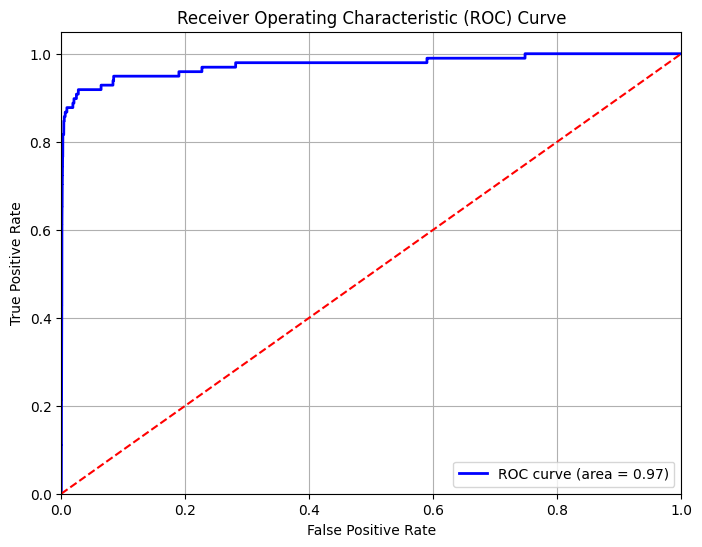

In [43]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Optimizing hyperparameters with random search and cross-validation

In [44]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5, 7],
}

# Setingup up the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train_resampled, y_train_resampled)


print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.0

Only a negligible increase in accuracy. Now switching to hyperopt to see if there is any difference. 

In [47]:
space = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),  # equivalent to 0.001 to 1
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),
    'gamma': hp.quniform('gamma', 0, 0.5, 0.05),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1)
}

def objective(params):
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    params['min_child_weight'] = int(params['min_child_weight'])
    
    model = XGBClassifier(
        random_state=42, 
        eval_metric='logloss',
        **params
    )
    
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # We aim to minimize the negative accuracy to maximize accuracy
    return {'loss': -accuracy, 'status': STATUS_OK}


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,  
            trials=trials,
            rstate=None)  


print("Best hyperparameters:", best)

100%|██████████| 50/50 [00:10<00:00,  4.90trial/s, best loss: -0.9615884273726344]
Best hyperparameters: {'colsample_bytree': np.float64(0.9244202768357788), 'gamma': np.float64(0.35000000000000003), 'learning_rate': np.float64(0.05230167614514378), 'max_depth': np.float64(9.0), 'min_child_weight': np.float64(2.0), 'n_estimators': np.float64(100.0), 'subsample': np.float64(0.7733975304411316)}


In [50]:
best_params = {
    'max_depth': int(best['max_depth']),
    'learning_rate': float(best['learning_rate']),
    'n_estimators': int(best['n_estimators']),
    'gamma': float(best['gamma']),
    'subsample': float(best['subsample']),
    'colsample_bytree': float(best['colsample_bytree']),
    'min_child_weight': int(best['min_child_weight'])
}


best_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    **best_params
)


best_model.fit(X_train_resampled, y_train_resampled)


y_pred = best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[54684  2180]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962


Accuracy Score:
0.9615884273726344


I achieved negligible improvement in accuracy. Let's try another model -- Nearest Centroid. 

### Trying Support Vector Machine Classifier

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


model_nc = LDA()
model_nc.fit(X_train_resampled, y_train_resampled)


y_pred = model_nc.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[55964   900]
 [   16    82]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.84      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.91      0.57     56962
weighted avg       1.00      0.98      0.99     56962


Accuracy Score:
0.9839191039640462


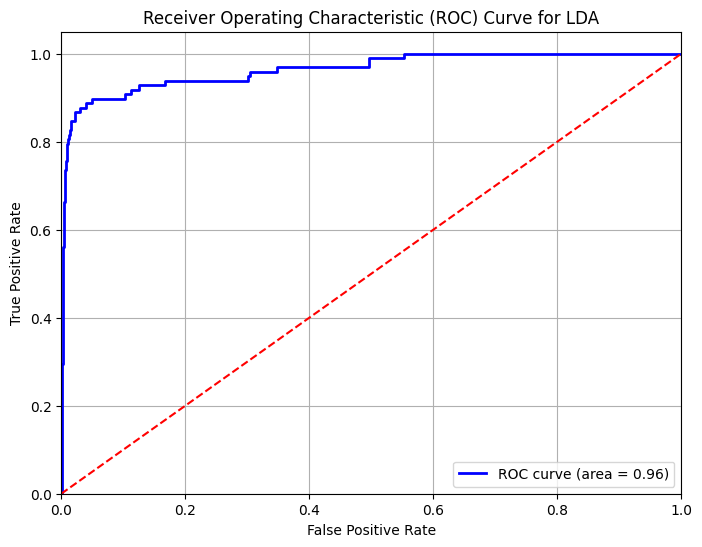

In [13]:
y_pred_proba_nc = model_nc.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class


fpr, tpr, _ = roc_curve(y_test, y_pred_proba_nc)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for reference (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LDA')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Let's try and optimize some hyperparameters to see if the model can do an even better job

In [15]:
lda_space = {
    'solver': hp.choice('solver', ['svd', 'lsqr', 'eigen']),  # Different solvers for LDA
    'shrinkage': hp.choice('shrinkage', [None, 'auto', hp.uniform('shrinkage_coef', 0.0, 1.0)]),  # Shrinkage parameter
}


def lda_objective(params):
    # Handle shrinkage only if the solver is 'lsqr' or 'eigen'
    if params['solver'] == 'svd':
        params.pop('shrinkage', None)  # Remove shrinkage if not applicable
    
    model = LDA(**params)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # We aim to maximize accuracy, so we minimize the negative accuracy
    return {'loss': -accuracy, 'status': STATUS_OK}

lda_trials = Trials()
lda_best = fmin(fn=lda_objective,
            space=lda_space,
            algo=tpe.suggest,
            max_evals=50,  # Number of iterations
            trials=lda_trials)

lda_best['solver'] = ['svd', 'lsqr', 'eigen'][lda_best['solver']]
if 'shrinkage' in lda_best:
    if isinstance(lda_best['shrinkage'], float):
        lda_best['shrinkage'] = lda_best['shrinkage']
    else:
        lda_best['shrinkage'] = [None, 'auto'][lda_best['shrinkage']]

print("Best hyperparameters:", lda_best)

100%|██████████| 50/50 [00:00<00:00, 187.80trial/s, best loss: -0.9872019943119975]
Best hyperparameters: {'shrinkage': 'auto', 'solver': 'eigen'}


In [16]:
best_model_lda = LDA(**lda_best)
best_model_lda.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = best_model_lda.predict(X_test)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[56151   713]
 [   16    82]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.84      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962


Accuracy Score:
0.9872019943119975


I've achieved only a marginal increase in accuracy. Nevertheless this model is somewhat better than the XGBoost Classifier